In [23]:
using Plots
using LaTeXStrings
include("worksheet1functions.jl")
pyplot()

Plots.PyPlotBackend()

$\textbf{QUESTION 1.1}$

The recursive functions required in parts 1 and 2 of this question have been created in the file "worksheet1functions". The recursive function which uses Float32 arithemtic is called "recursion32" and the recursive function which uses Float64 arithmetic is called "recursion64". A log-lin plot for both of these functions have been plotted below with respect to the number of iterations carried out. As the question requires we have genreated a sequence of $80$ terms, using iterative algorithms out of preference.


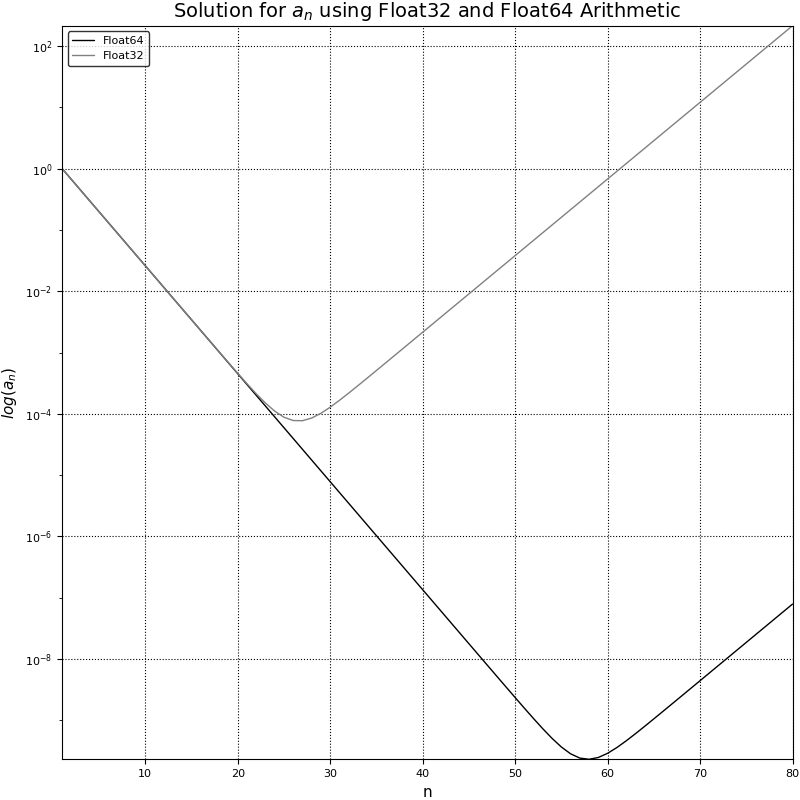

In [57]:
w = collect(1:80)
y32 = recursion32(80)
y64 = recursion64(80)

plot(w,y64,yscale = :log, label = "Float64", xlabel = "n", ylabel = "\$log(a_n)\$",
title = "Solution for \$a_n\$ using Float32 and Float64 Arithmetic", titlefont = font(14), color = "black")
plot!(w,y32,yscale = :log, label = "Float32", color = "grey")

Now we would like to solve the recurrence relation analytically. It is given in the question that
$$ a_{n + 1} = 2a_{n} - \frac{8}{9}a_{n - 1} \text{ for } n \geq 1, \text{ } n \in \mathbb{Z} \text{ where } a_{1} = 1 \text{ and } a_{2} = \frac{2}{3}.$$
We suppose that $ a_{n} = x^{n} $. Then our recurrence relation becomes the auxiliary equation
$$ x^{n + 1} = 2x^n - \frac{8}{9}x^{n - 1} \Rightarrow x^2 - 2x + \frac{8}{9} = 0 \Rightarrow 9x^2 - 18x + 8 = 0 .$$
Using the quadratic formula, the solution to this equation is
$$ x = \frac{2 \pm \sqrt{\frac{36 - 32}{9}}}{2} = 1 \pm \frac{2}{3} .$$
$$ \Rightarrow a_{n} = A\left( \frac{1}{3} \right)^n + B\left( \frac{5}{3} \right)^n \text{ where A and B are constants.} $$
Now it is time to make use of our inital conditions. Then,
$$ \Rightarrow a_{1} = 1 = \frac{A}{3} + \frac{5B}{3} \Rightarrow A + 5B = 3 $$
and
$$ a_{2} = \frac{2}{3} = A\left( \frac{1}{3} \right)^2 + B\left( \frac{5}{3} \right)^2 \Rightarrow A + 25B = 6 .$$
By using Gaussian elimination or some other linear solve algorithm, one finds that $A = \frac{9}{4}$ and $B = \frac{3}{20}$. Therefore
$$ a_{n} = \frac{9}{4}\left( \frac{1}{3} \right)^n + \frac{3}{20}\left( \frac{5}{3} \right)^n ,$$
so analytically, we should expect to see a strictly positive monotonic decresing sequence of real numbers. This is observed somewhat in the graph above for Float32 and Foat64 recursion up to certain points in which $a_{n}$ starts to increase again. This is due to round-off error associated with their respective arithmetics.

We will now try to develop some intuition for why this happens by instead considering the intial conditions $a_{1} = 1$ and $a_{2} = \frac{2}{3} + \epsilon$ where $\epsilon$ is some real constant. Our equation stemming from our condition for $a_{1}$ stays the same however our equation stemming from our new condition for $a_{2}$ becomes
$$ A + 25B = 6 + 9\epsilon . $$

This gives us
$$ A = \frac{9}{4}(1 - \epsilon) \text{ and } B = \frac{3 + 9\epsilon}{20}, $$
so
$$ a_{n} = \frac{9}{4}(1 - \epsilon)\left( \frac{1}{3} \right)^n + \frac{3 + 9\epsilon}{20}\left( \frac{5}{3} \right)^n = \left[ \frac{9}{4}\left(\frac{1}{3}\right)^n + \left(\frac{3 + 9\epsilon}{20}\right)\left(\frac{5}{3}\right)^n\right] + \frac{9\epsilon}{4}\left[\frac{1}{5}\left(\frac{5}{3}\right)^n - \left(\frac{1}{3}\right)^n\right].$$

We therefore conclude that if we include an error term in our initial condition (due to the machine precision of the type of floating point arithmetic used), our formula for $a_{n}$ also becomes dependent on that error term.

As we increase the number of bits the computer can use in order to carry out the required arithmetic, the error term (although always positive) decreases. Therefore the higher the number of bits used, the longer it will take for $a_{n}$ to suddenly start increasing. We can see that this is the case for Float32 and Float64 arithmetic in the graph above.

In the graph below, we use BigFloat arithmetic (where we use 128 bits). As expected, $a{n}$ decreases for much longer than the solution for $a_n$ in Float32 and Float64 arithmetic.


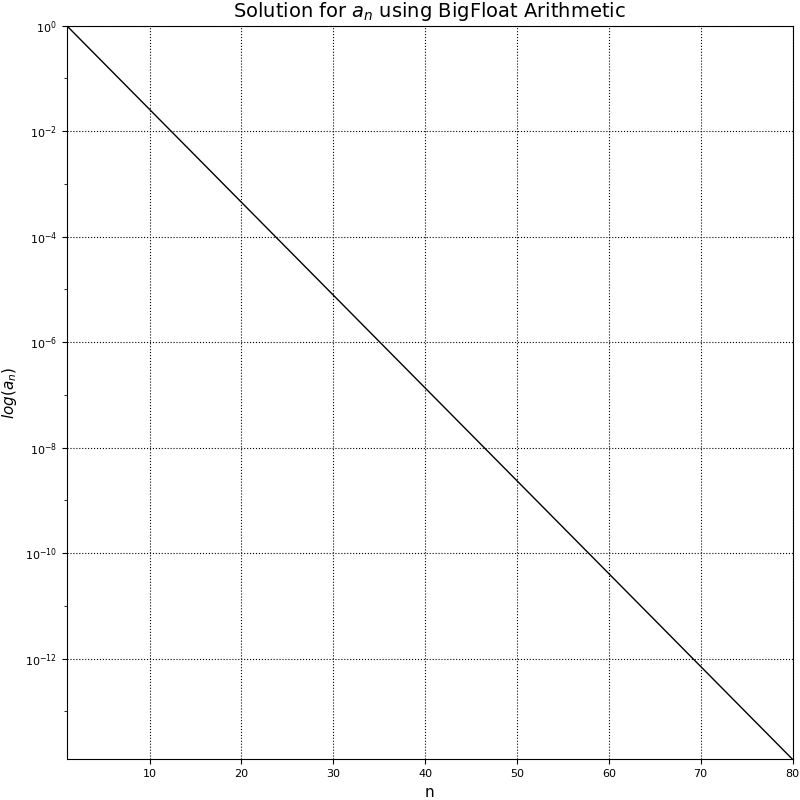

In [56]:
w = collect(1:80)
y128 = recursion128(80)

plot(w,y128,yscale = :log, legend = false, xlabel = "n", ylabel = "\$\log(a_n)\$",
title = "Solution for \$a_n\$ using BigFloat Arithmetic", titlefont = font(14), color = "black")

$\textbf{QUESTION 1.2}$

Below is an example of the mergepresorted function in action.

In [58]:
A = [1, 2, 3, 5, 4]
B = [0, 6, 8]
mergepresorted(A,B)

8-element Array{Int64,1}:
 0
 1
 2
 3
 5
 4
 6
 8

In "worksheet1functions.jl" we also have writted a function called 'mergesort' that merge sorts a list using the mergepresorted function. This function works on lists of varying lengths (not just for lists of length $2^n$ where $n \in \mathbb{N}_{0}$, in other words a natural number where $0$ is included as a possibility. In the next couple of cells we test out the mergesort function, first with a list of length $2^n$, and another not of length $2^n$.

In [20]:
C = [12, 5, 3, 1, 10, 9, 5, 8]
mergesort(C)

8-element Array{Int64,1}:
  1
  3
  5
  5
  8
  9
 10
 12

In [21]:
D = [12, 5, 3, 1, 10, 9, 5, 8, 11]
mergesort(D)

9-element Array{Int64,1}:
  1
  3
  5
  5
  8
  9
 10
 11
 12

In order to prove that the recurrence relation for the complexity of the mergesort algorithm is $F(n) = 2F\left(\frac{n}{2}\right) + n$, we need to understand how the mergesort algorithm works.

Firstly, we must acknowledge that merge sort is a recursive process meaning that applying the mergesort algorithm on an unordered list requires us to mergesort smaller sublists first. Assuming we are applying merge sort to a list of length $2^{n}$. Then we first split this set into two equally sized subsets and apply the merge sort algorithm to each of these subsets, hence we get a factor of $2F(\frac{n}{2})$.

As part of the merge sort algorithm we then have to merge these two sublists which requires a complexity of $n$ since there are at most $n$ elements in the set that need to be reordered. Therefore we must conclude that $F(n) = 2F\left(\frac{n}{2}\right) + n$ as required. Written fully as a recurrence relation, we therefore would like to solve the following problem.

$$F(n) = 2F\left(\frac{n}{2}\right) + n, \, F(1) = 1. $$

Let $n = 2^{p}$ where $p \in \mathbf{N}_{0}$. Then $b_{p} = F(2^p)$ and $b_{0} = 1$.
$$ b_{p} + 2b_{p - 1} + 2^{p} $$
We will first find the complementary function for this recurrence relation by solving the following equation.
$$ b_{p} - 2b_{p - 1} = 0 $$
Suppose that $ b_{p} = x^p $. Then
$$ x^{p - 1}(x - 2) = 0 $$
$$ \Rightarrow x = 0 \text{ or } x = 2 \Rightarrow b_{p} = A(2^{p}), $$
where $A$ is some unknown constant.

We would now like to find the particular solution. We suppose that $ b_{p} = B(2^p) $ where $B$ is some unknown constant. Then
$$ Bp(2^p) = 2B(p - 1)(2^{p - 1}) + 2^p = (B(p - 1) + 1)2^p $$
Since both the left and right hand sides of the equation above has a multiplicative factor of $2^p$, the above equation can be reduced to
$$ Bp = B(p - 1) + 1 \Rightarrow B = 1 $$
$$ \Rightarrow b_{p} = p(2^p). $$

Combining both our complimentary function and particular solution, the general solution of our recurrence relation is therefore
$$ \Rightarrow b_{p} = (A + p)2^p .$$
$$ b_{0} = 1 \Rightarrow A = 1 $$
$$ \Rightarrow b_{p} = (1 + p)2^p. $$

We would now like to rewrite the above recurrence relation in terms of $F(n)$ and $n$.
$$ n = 2^p \Rightarrow p = \frac{\log n}{\log2} $$

$$ \therefore F(2^p) = \left(1 + \frac{\log n}{\log2}\right)2^p. $$
In other words,
$$ F(n) = \left(1 + \frac{\log n}{\log2}\right)n $$
$$ = n + \frac{n\log n}{\log2} \leq \frac{n\log n}{\log 2} = \left( \frac{1}{\log 2} \right)n\log n $$
$$ = O(n\log n). $$
where in the last equality we've used the Big O notation, which is true when $n \geq 1$ and $M = \frac{1}{\log 2} > 0$.

Below is a graph comparing the theoretical time with the empirical time taken to conduct a merge sort on a list of length $n$. From what we see, the theoretical time is always lower than the empirical time and the difference between them increases with the length of the list. This is to be expected since nothing is ever 100% efficient.


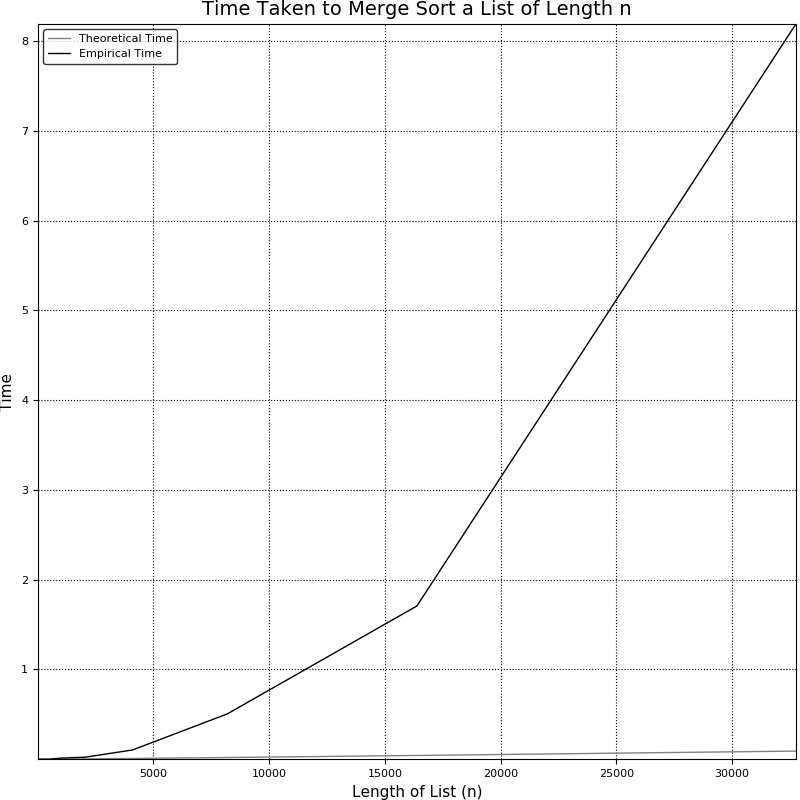

In [22]:
theotime = zeros(15)
empitime = zeros(15)

for i = 1:15
    x = rand(1:2^i,2^i)
    theotime[i] = (2^i)*log(2^i)
    temp = @timed mergesorted(x)
    empitime[i] = temp[2]
end

t = zeros(15)
for i = 1:15
    t[i] = 2^i
end

theotime = empitime[1]*theotime

default(size=(800,800))
plot(t,theotime,label = "Theoretical Time",xlabel = "Length of List (n)",
    ylabel = "Time",title = "Time Taken to Merge Sort a List of Length n",color = "grey")
plot!(t,empitime,label = "Empirical Time",color = "black")